In [ ]:
Customer segementation by *MAVERICK_GR*

In [1]:
#import all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
print('Setup complete')

Setup complete


In [2]:
# Read the CSV file and load it into a dataframe
df = pd.read_csv('C:\MLCourse\Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Rename the lengthy column names into compact names for ease of use
df.rename(columns = {'Annual Income (k$)':'A_I','Spending Score (1-100)':'S_S'}, inplace=True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'A_I', 'S_S'], dtype='object')

In [4]:
# Check for any null values in the dataframe
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
A_I           0
S_S           0
dtype: int64

In [5]:
# Using describe function to identify the range of each feature 
df.describe()


,CustomerID,Age,A_I,S_S
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='A_I', ylabel='S_S'>

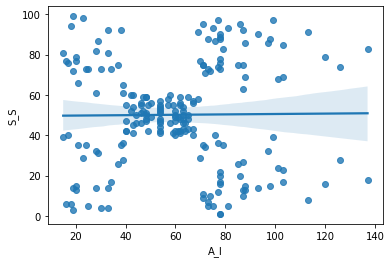

In [6]:
# Using scatter to plot to identify relationship between Annual Income and Spending score
# Seems be to no correlation between the both
sns.regplot(x='A_I', y='S_S', data=df)

<AxesSubplot:xlabel='Age', ylabel='S_S'>

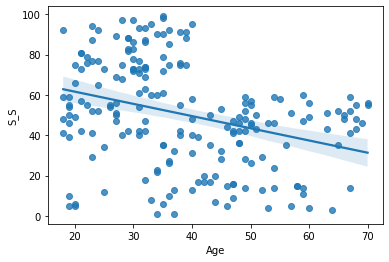

In [7]:
# Using scatter to plot to identify relationship between Age and Spending score
# Spending score seems to be going down with the age
sns.regplot(x='Age', y='S_S', data=df)

<AxesSubplot:xlabel='Age', ylabel='A_I'>

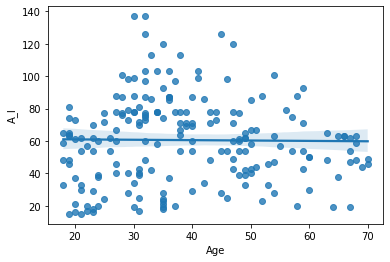

In [8]:
# Using scatter to plot to identify relationship between Age and Annual Income 
# Seems be to no correlation between the both
sns.regplot(x='Age', y='A_I', data=df)

<AxesSubplot:xlabel='Gender', ylabel='A_I'>

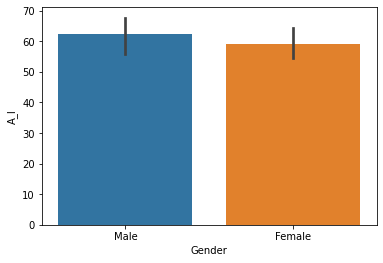

In [9]:
# Men seems to be having slightly higher Annual Income
sns.barplot(x=df['Gender'],y=df['A_I'])

<AxesSubplot:xlabel='Gender', ylabel='S_S'>

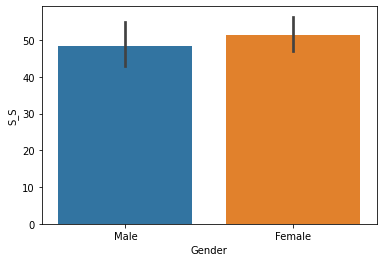

In [10]:
# Women seems to be having slightly higher spending scores
sns.barplot(x=df['Gender'],y=df['S_S'])

<AxesSubplot:xlabel='count', ylabel='Gender'>

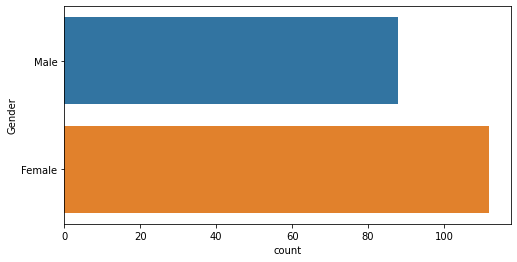

In [11]:
# Dataset seems to have details of more women than men
plt.figure(figsize=(8,4))
sns.countplot(y= 'Gender', data=df)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

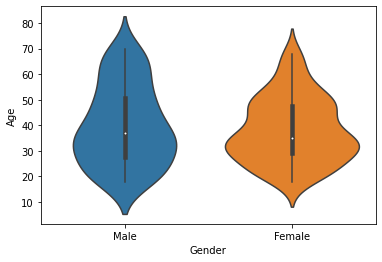

In [12]:
# Dataset seems to have more women in the age range of 30-40
sns.violinplot(x='Gender',y='Age', data=df)

<AxesSubplot:xlabel='Gender', ylabel='A_I'>

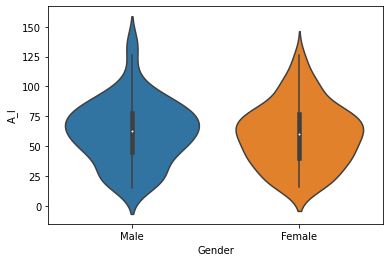

In [13]:
# More number of men and women seem to be having Annual Income in range of 50-75 K$
sns.violinplot(x='Gender',y='A_I', data=df)

<AxesSubplot:xlabel='Gender', ylabel='S_S'>

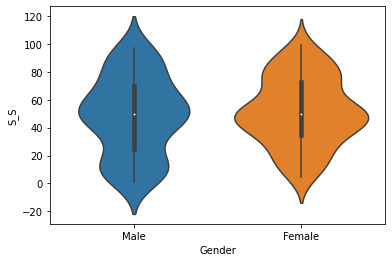

In [14]:
# More females seem to be having a spending score between 40-60
sns.violinplot(x='Gender',y='S_S', data=df)

Text(0.5, 1.0, 'Graph showing the number of people in specific age group')

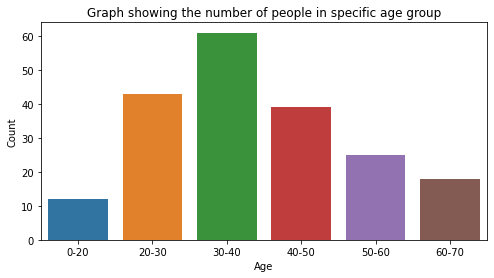

In [15]:
# Graph showing people in various age groups
A_0_20 = df['Age'][(df['Age']>=0) & (df['Age']< 20)]
A_20_30 = df['Age'][(df['Age']>=20) & (df['Age']< 30)]
A_30_40 = df['Age'][(df['Age']>=30) & (df['Age']< 40)]
A_40_50 = df['Age'][(df['Age']>=40) & (df['Age']< 50)]
A_50_60 = df['Age'][(df['Age']>=50) & (df['Age']< 60)]
A_60_70 = df['Age'][(df['Age']>=60) & (df['Age']< 70)]

plt.figure(figsize=(8,4))
x = ['0-20','20-30','30-40','40-50','50-60','60-70']
y = [A_0_20.count(),A_20_30.count(),A_30_40.count(),A_40_50.count(),A_50_60.count(),A_60_70.count()]
sns.barplot(x,y)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Graph showing the number of people in specific age group')

Text(0.5, 1.0, 'Graph showing the annual income of the customers')

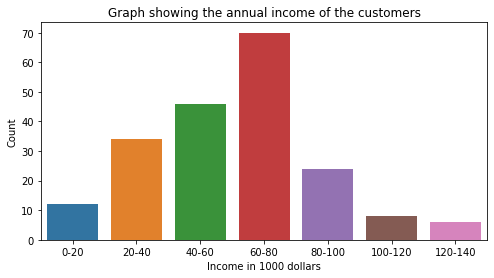

In [16]:
# Graph showing people with different Annual Income groups
I_0_20 = df['A_I'][(df['A_I']>=0) & (df['A_I']<20)]
I_20_40 = df['A_I'][(df['A_I']>=20) & (df['A_I']<40)]
I_40_60 = df['A_I'][(df['A_I']>=40) & (df['A_I']<60)]
I_60_80 = df['A_I'][(df['A_I']>=60) & (df['A_I']<80)]
I_80_100 = df['A_I'][(df['A_I']>=80) & (df['A_I']<100)]
I_100_120 = df['A_I'][(df['A_I']>=100) & (df['A_I']<120)]
I_120_140 = df['A_I'][(df['A_I']>=120) & (df['A_I']<140)]

plt.figure(figsize=(8,4))
x = ['0-20','20-40','40-60','60-80','80-100','100-120','120-140']
y = [I_0_20.count(), I_20_40.count(),I_40_60.count(),I_60_80.count(),I_80_100.count(),I_100_120.count(),I_120_140.count()]
sns.barplot(x,y)
plt.xlabel('Income in 1000 dollars')
plt.ylabel('Count')
plt.title('Graph showing the annual income of the customers')

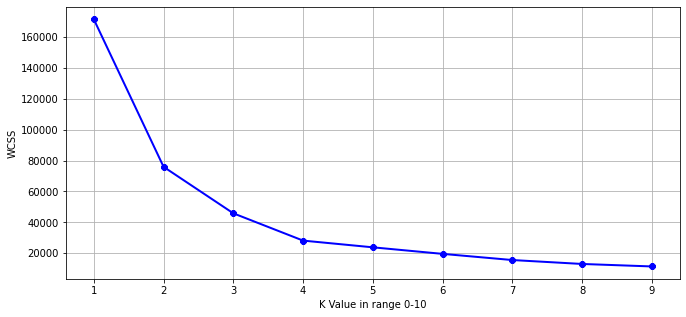

In [17]:
# Finding the optimum number of clusters using KMeans clustering
X = df[['Age','S_S']]
wcss = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(11,5))
plt.grid()
plt.plot(range(1,10),wcss,linewidth=2,color='blue',marker='8')
plt.xlabel('K Value in range 0-10')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 1.0, 'Cluster of customers based on age and spending score')

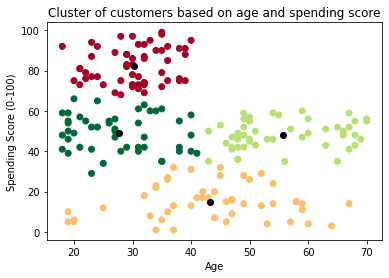

In [18]:
# Customer segmentation
kmeans = KMeans(n_clusters = 4)
labels = kmeans.fit_predict(X)
df['cat'] = labels
plt.scatter(X['Age'],X['S_S'], c=kmeans.labels_, cmap="RdYlGn")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.xlabel('Age')
plt.ylabel('Spending Score (0-100)')
plt.title('Cluster of customers based on age and spending score')

**Customers are segmented as,**
1. Dark green color representing people with low spending score
2. Cream color representing young people with medium spending score
3. Maroon color representing middle to old aged people with medium spending score
4. Light green color representing young people with high spending score